# 📘 Advanced Internship Assignment: Data Exploration & Analysis in Python

---

## 📦 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

## 🧾 2. Load the Dataset (Big Mart Sales)

# Load the dataset
file_path = "dataset/big_mart_sales.csv"
df = pd.read_csv(file_path)
df.head()

In [3]:
df = pd.read_csv("big_mart_sales.csv")

### ✅ Task:
- Display the dataset info
- Count missing values
- Understand the basic structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.shape

(8523, 12)

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 🔧 3. Data Cleaning & Imputation

# Fill missing weights with mean
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Fill outlet size with mode
if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [15]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)

C:\Users\valan\AppData\Local\Temp\ipykernel_66824\3836821372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace = True)


In [27]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace = True)

C:\Users\valan\AppData\Local\Temp\ipykernel_66824\774011526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace = True)


In [29]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 📊 4. Feature Engineering

# Create new features based on domain knowledge
if 'Item_Visibility' in df.columns:
    df['Item_Visibility_Bin'] = pd.cut(df['Item_Visibility'], bins=[-1, 0.02, 0.07, 0.2, 1.0], labels=['Low', 'Medium', 'High', 'Very High'])

# Normalize Item_MRP
if 'Item_MRP' in df.columns:
    df['Item_MRP_Normalized'] = (df['Item_MRP'] - df['Item_MRP'].min()) / (df['Item_MRP'].max() - df['Item_MRP'].min())

In [31]:
df["Item_Visibility_Bin"] = pd.cut(df["Item_Visibility"],
                                   bins =[-1,0.02,0.07,0.2,1.0],
                                   labels=["Low","Medium","High","Very High"])

In [33]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bin
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low


In [37]:
df["Item_MRP_Normalized"]=(df["Item_MRP"]-df["Item_MRP"].min())/(df["Item_MRP"].max()-df["Item_MRP"].min())

In [39]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bin,Item_MRP_Normalized
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low,0.927507
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low,0.072068


## 📈 5. Exploratory Data Analysis (EDA)

# Distribution of target variable
plt.figure(figsize=(8, 4))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

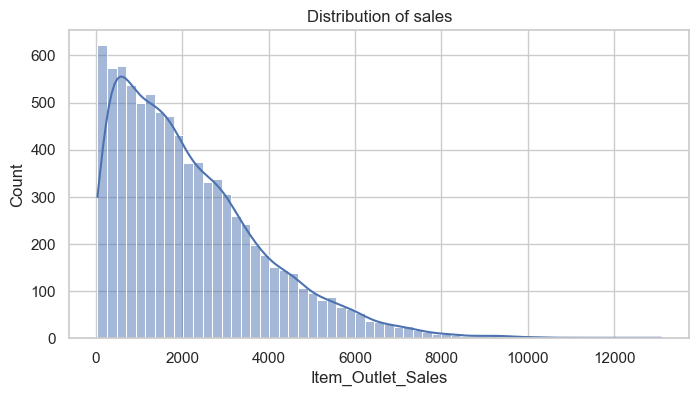

In [43]:
plt.figure(figsize =(8,4))
sns.histplot(df["Item_Outlet_Sales"],kde = True)
plt.title("Distribution of sales")
plt.show()

# Sales by Outlet Type
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales by Outlet Type')
plt.xticks(rotation=45)
plt.show()

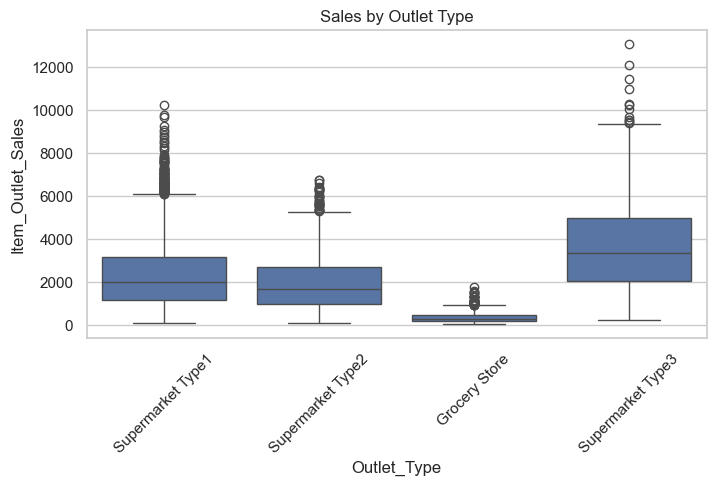

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(data = df,x="Outlet_Type",y = "Item_Outlet_Sales")
plt.title("Sales by Outlet Type")
plt.xticks(rotation=45)
plt.show()

## 📐 6. Advanced Subsetting with NumPy & Conditions

# Filter high selling products
high_sales = df['Item_Outlet_Sales'] > df['Item_Outlet_Sales'].quantile(0.90)
df_high_sales = df[high_sales]
df_high_sales[['Item_Identifier', 'Item_Outlet_Sales']].head()

In [53]:
high_sales= df["Item_Outlet_Sales"]>df["Item_Outlet_Sales"].quantile(0.90)
df_high_sales = df[high_sales]
df_high_sales[["Item_Identifier","Item_Outlet_Sales"]].head()

,Item_Identifier,Item_Outlet_Sales
9,FDU28,4710.5350
43,FDC02,6768.5228
47,FDV49,5815.0972
54,NCP18,4815.0656
55,FDK21,6258.5200


# Use NumPy to apply conditional logic
df['High_Price'] = np.where(df['Item_MRP'] > 200, 1, 0)
df[['Item_MRP', 'High_Price']].head()

In [56]:
df["High_Price"]=np.where(df['Item_MRP']>200,1,0)
df[['Item_MRP','High_Price']].head()

,Item_MRP,High_Price
0,249.8092,1
1,48.2692,0
2,141.6180,0
3,182.0950,0
4,53.8614,0


## 📉 7. Correlation Heatmap

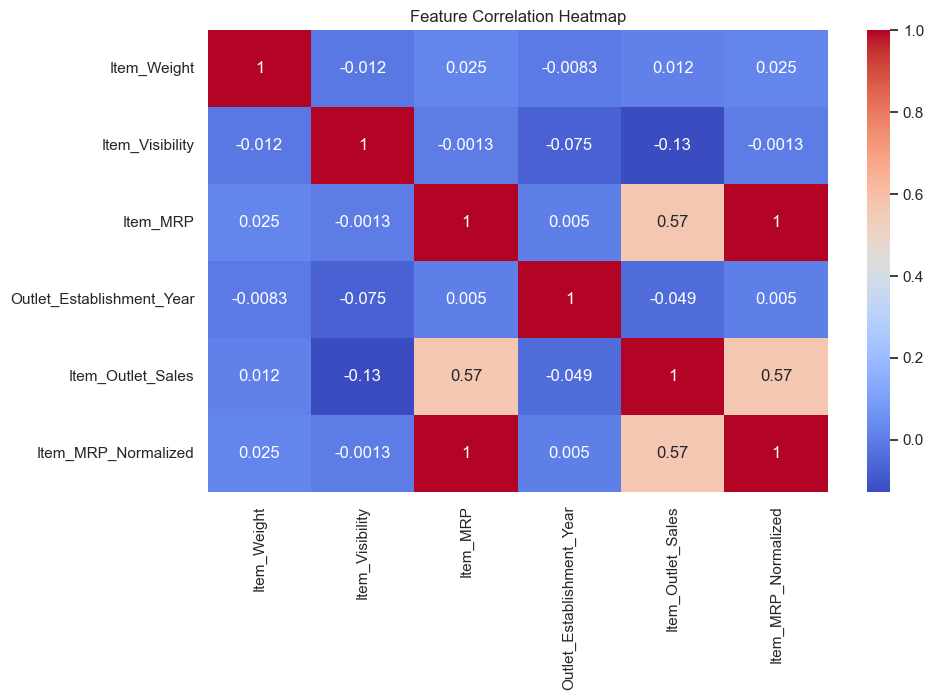

In [41]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 📌 Final Project Task

'''Create a business dashboard answering:
1. What product categories perform best?
2. Which outlet types generate more revenue?
3. Are high MRP products really driving more sales?

Deliverables:
- Python notebook with visualizations
- Insight summary (2 paragraphs)
- Exported charts/images if needed
'''


In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_Bin,Item_MRP_Normalized,High_Price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low,0.927507,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low,0.072068,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low,0.468288,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Low,0.640093,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low,0.095805,0


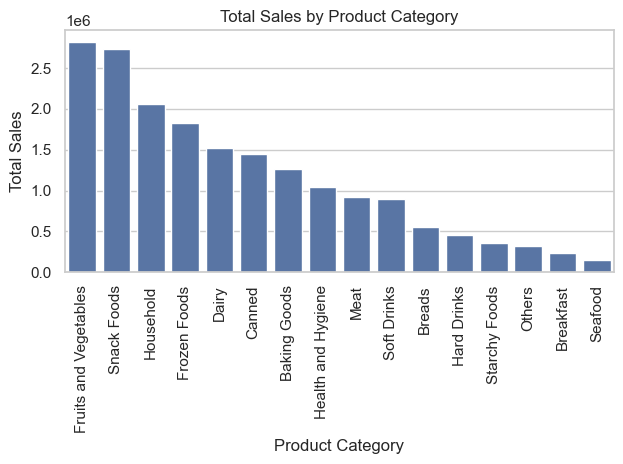

In [70]:
category_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

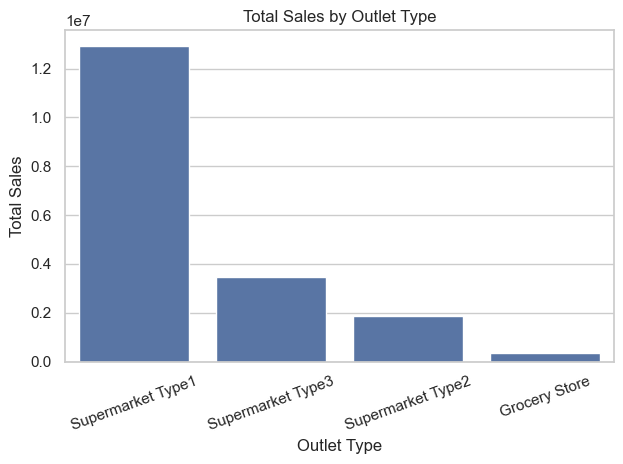

In [74]:
outlet_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=outlet_sales.index, y=outlet_sales.values)
plt.xticks(rotation=20)
plt.title("Total Sales by Outlet Type")
plt.ylabel("Total Sales")
plt.xlabel("Outlet Type")
plt.tight_layout()
plt.show()

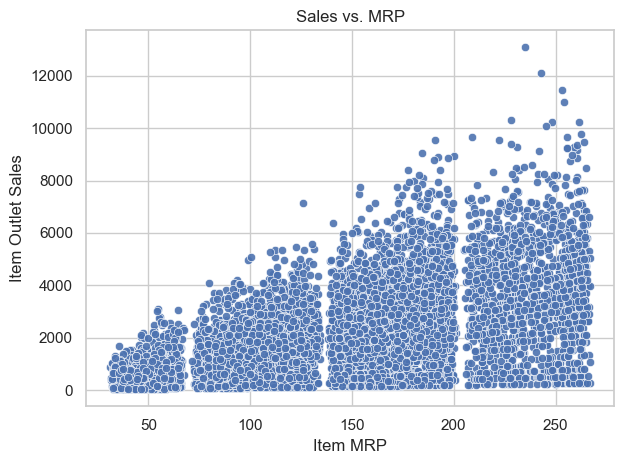

In [82]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.9)
plt.title("Sales vs. MRP")
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.tight_layout()
plt.show()

The analysis of the Big Mart Sales data shows that certain product categories consistently outperform others in terms of total sales. Categories such as Fruits and Vegetables, Snack Foods, and Household items contribute the most revenue, indicating strong consumer demand in these segments. This suggests that focusing inventory and promotions on these categories could boost overall sales.

Regarding outlet performance, Supermarket Type1 outlets generate the highest sales, while Grocery Stores lag behind. Additionally, there is a clear positive relationship between product price (MRP) and sales, with higher-priced items generally driving more revenue. This indicates that premium products play a significant role in sales performance and should be prioritized in marketing and stocking strategies.